In [384]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('figs.mplstyle')

In [385]:
paperOverWood50 = pd.read_csv('data/papel_madera_50.csv')
paperOverPaper50 = pd.read_csv('data/papel_papel_50.csv')
paperOverPaper100 = pd.read_csv('data/papel_papel_100.csv')
paperOverPaper150 = pd.read_csv('data/papel_papel_150.csv')
plasticOverWood50 = pd.read_csv('data/plastico_madera_50.csv')
plasticOverWood100 = pd.read_csv('data/plastico_madera_100.csv')
plasticOverWood150 = pd.read_csv('data/plastico_madera_150.csv')
plasticOverWood200 = pd.read_csv('data/plastico_madera_200.csv')
plasticOverPaper50 = pd.read_csv('data/plastico_papel_50.csv')
plasticOverPaper100 = pd.read_csv('data/plastico_papel_100.csv')
plasticOverPaper150 = pd.read_csv('data/plastico_papel_150.csv')

# mm to m and ms to s
paperOverWood50 *= 1e-3
paperOverPaper50 *= 1e-3
paperOverPaper100 *= 1e-3
paperOverPaper150 *= 1e-3
plasticOverWood50 *= 1e-3
plasticOverWood100 *= 1e-3
plasticOverWood150 *= 1e-3
plasticOverWood200 *= 1e-3
plasticOverPaper50 *= 1e-3
plasticOverPaper100 *= 1e-3
plasticOverPaper150 *= 1e-3

woodenMass = 6.0 * 1e-3
aluminiumMass = 22.0 * 1e-3
bronzeMass = 72.0 * 1e-3
sled = 110.0 * 1e-3
sensor_error = 3.0	

ddotX = lambda m1, m2, g, dynamicMu: g * (m2 - dynamicMu * m1) / (m1 + m2)
x = lambda t, m1, m2, g, dynamicMu: 0.5 * t**2 * ddotX(m1, m2, g, dynamicMu)
sigmaMu = lambda m1, m2, g, a: np.sqrt((0.01**2) * (((a*m2) / (g * (m1**2))) - ((m2 / (m1**2))))**2 + (0.01**2) * (-(a / (g * m1)) + (1 / m1))**2)

dynamicMu = 0.42
ddot_err = 1.29e-02
sigmamu = 6.7e-02


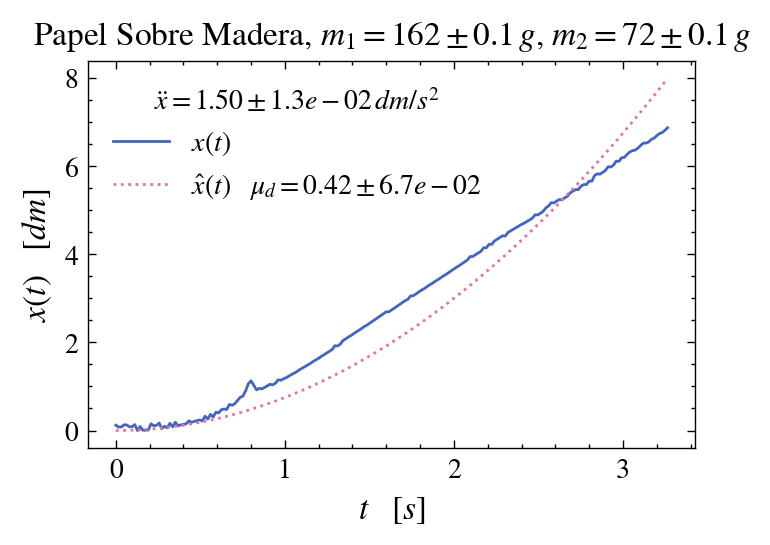

In [386]:
m1 = sled + 5 * woodenMass + aluminiumMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, paperOverWood50['t'], paperOverWood50['x'], sigma=np.zeros_like(paperOverWood50['x']) + sensor_error, absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')


plt.plot(paperOverWood50['t'], paperOverWood50['x']*1e1, label=f'$x(t)$')
plt.plot(paperOverWood50['t'], x(paperOverWood50['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Papel Sobre Madera, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()

dynamicMu = 0.44
ddot_err = 3.74e-03
sigmamu = 6.7e-02


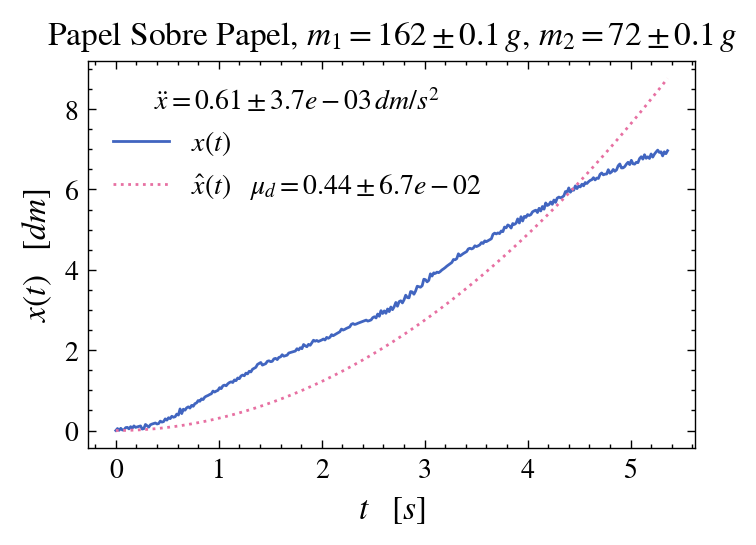

In [387]:
m1 = sled + 5 * woodenMass + aluminiumMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, paperOverPaper50['t'], paperOverPaper50['x'], sigma=np.zeros_like(paperOverPaper50['x']) + sensor_error , absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')

plt.plot(paperOverPaper50['t'], paperOverPaper50['x']*1e1, label=f'$x(t)$')
plt.plot(paperOverPaper50['t'], x(paperOverPaper50['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Papel Sobre Papel, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()

dynamicMu = 0.27
ddot_err = 5.68e-02
sigmamu = 4.6e-02


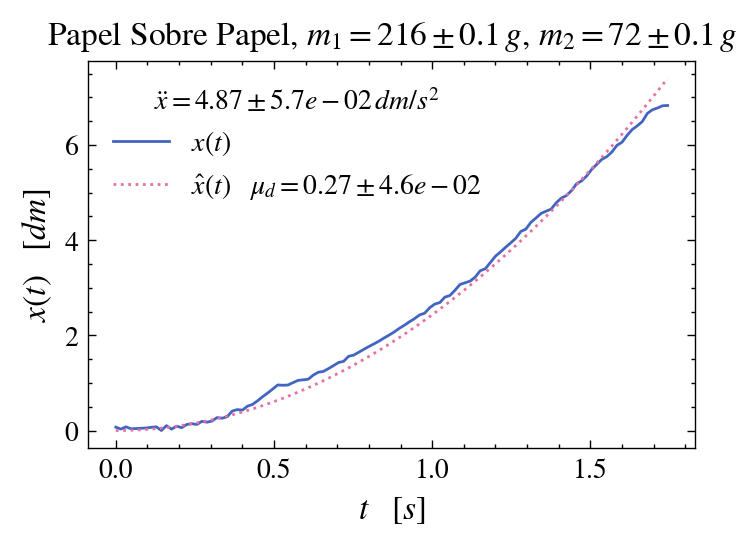

In [388]:
m1 = sled + 3 * woodenMass + 4 * aluminiumMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, paperOverPaper100['t'], paperOverPaper100['x'], sigma=np.zeros_like(paperOverPaper100['x']) + sensor_error, absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')

plt.plot(paperOverPaper100['t'], paperOverPaper100['x']*1e1, label=f'$x(t)$')
plt.plot(paperOverPaper100['t'], x(paperOverPaper100['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Papel Sobre Papel, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()

dynamicMu = 0.23
ddot_err = 2.42e-02
sigmamu = 3.6e-02


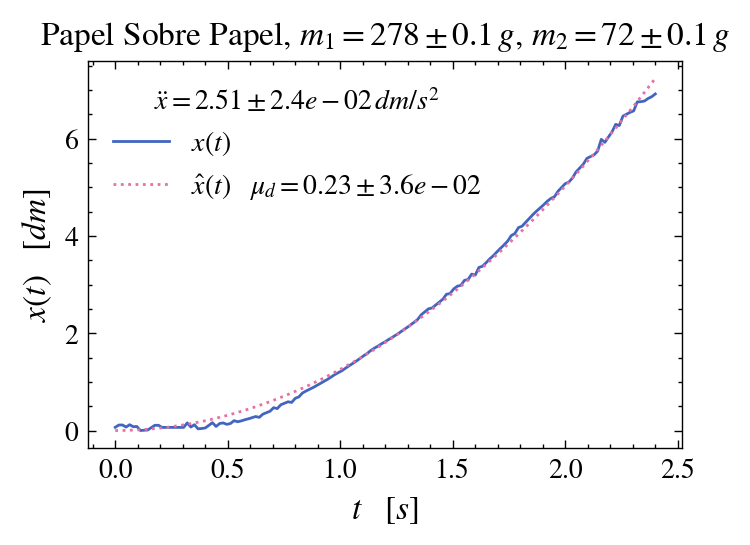

In [389]:
m1 = sled + 5 * woodenMass + 3 * aluminiumMass + bronzeMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, paperOverPaper150['t'], paperOverPaper150['x'], sigma=np.zeros_like(paperOverPaper150['x']) + sensor_error, absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')

plt.plot(paperOverPaper150['t'], paperOverPaper150['x']*1e1, label=f'$x(t)$')
plt.plot(paperOverPaper150['t'], x(paperOverPaper150['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Papel Sobre Papel, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()

dynamicMu = 0.27
ddot_err = 2.06e-01
sigmamu = 5.9e-02


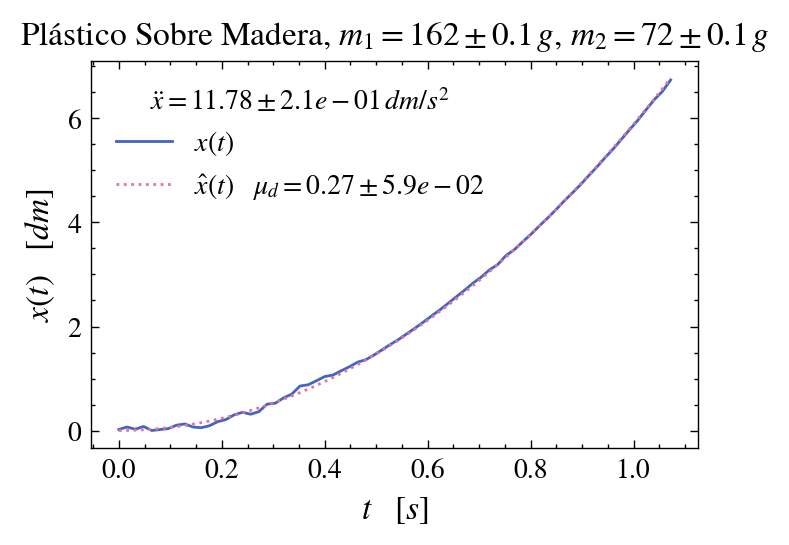

In [390]:
m1 = sled + 5 * woodenMass + aluminiumMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, plasticOverWood50['t'], plasticOverWood50['x'], sigma=np.zeros_like(plasticOverWood50['x']) + sensor_error, absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')

plt.plot(plasticOverWood50['t'], plasticOverWood50['x']*1e1, label=f'$x(t)$')
plt.plot(plasticOverWood50['t'], x(plasticOverWood50['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Plástico Sobre Madera, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()

dynamicMu = 0.22
ddot_err = 1.15e-01
sigmamu = 4.5e-02


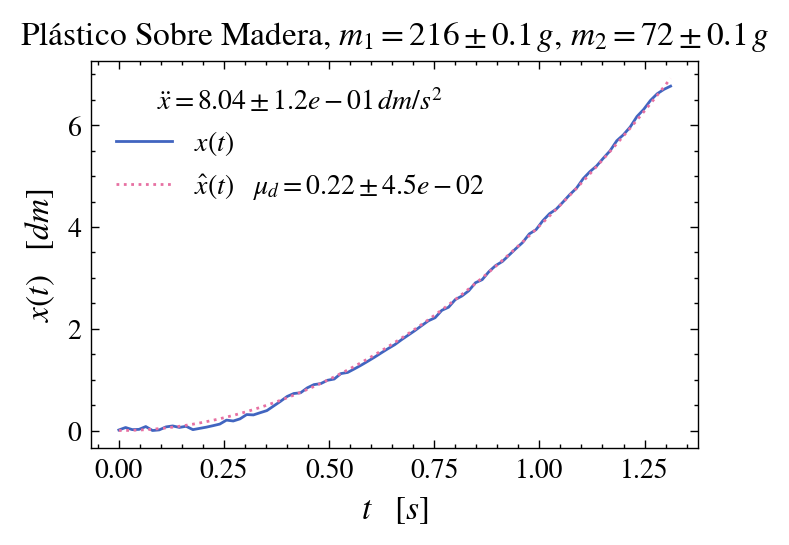

In [391]:
m1 = sled + 3 * woodenMass + 4 * aluminiumMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, plasticOverWood100['t'], plasticOverWood100['x'], sigma=np.zeros_like(plasticOverWood100['x']) + sensor_error, absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')

plt.plot(plasticOverWood100['t'], plasticOverWood100['x']*1e1, label=f'$x(t)$')
plt.plot(plasticOverWood100['t'], x(plasticOverWood100['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Plástico Sobre Madera, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()


dynamicMu = 0.20
ddot_err = 5.24e-02
sigmamu = 3.5e-02


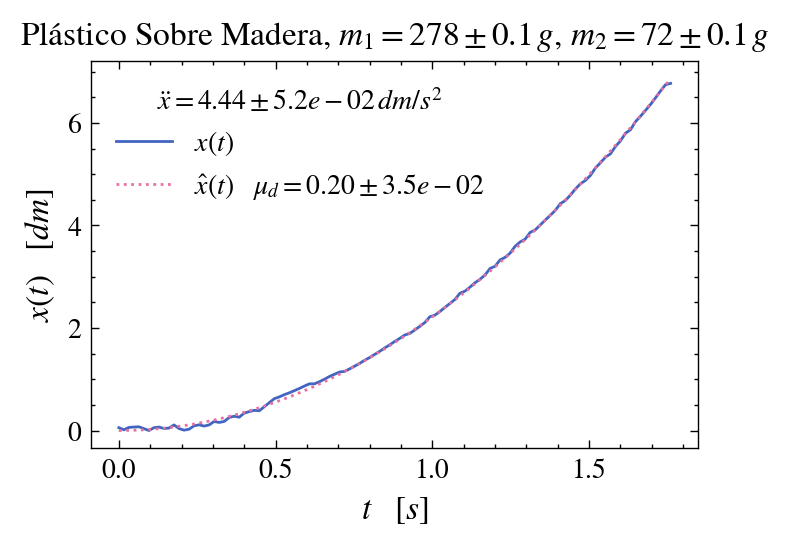

In [392]:
m1 = sled + 5 * woodenMass + 3 * aluminiumMass + bronzeMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, plasticOverWood150['t'], plasticOverWood150['x'], sigma=np.zeros_like(plasticOverWood150['x']) + sensor_error, absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')

plt.plot(plasticOverWood150['t'], plasticOverWood150['x']*1e1, label=f'$x(t)$')
plt.plot(plasticOverWood150['t'], x(plasticOverWood150['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Plástico Sobre Madera, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()


dynamicMu = 0.19
ddot_err = 3.20e-02
sigmamu = 3.2e-02


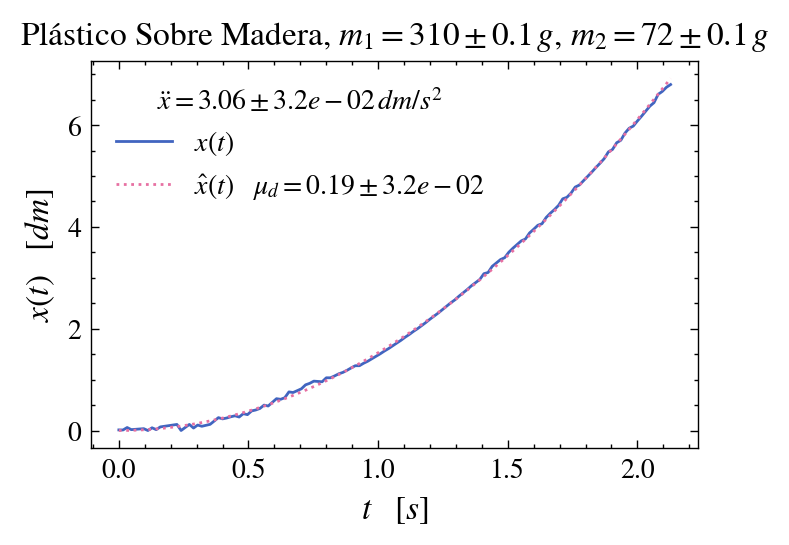

In [393]:
m1 = sled + 2 * woodenMass + 2 * aluminiumMass + 2 * bronzeMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, plasticOverWood200['t'], plasticOverWood200['x'], sigma=np.zeros_like(plasticOverWood200['x']) + sensor_error, absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')

plt.plot(plasticOverWood200['t'], plasticOverWood200['x']*1e1, label=f'$x(t)$')
plt.plot(plasticOverWood200['t'], x(plasticOverWood200['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Plástico Sobre Madera, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()

dynamicMu = 0.30
ddot_err = 1.56e-01
sigmamu = 6.1e-02


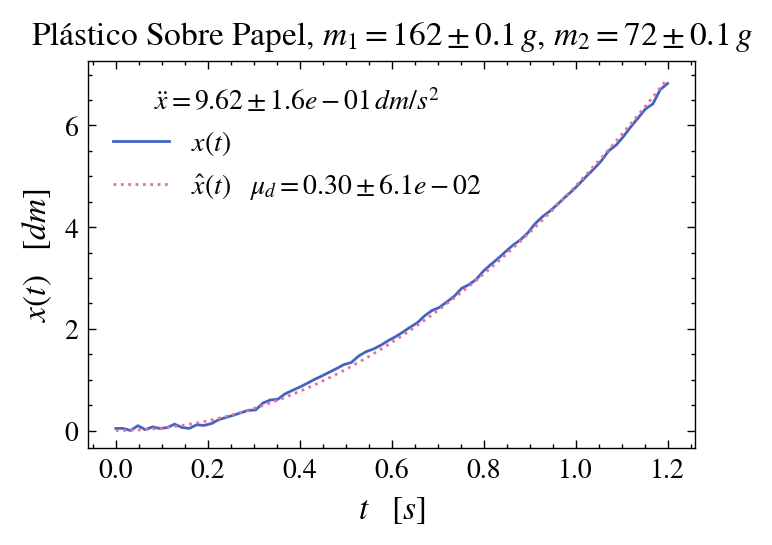

In [394]:
m1 = sled + 5 * woodenMass + aluminiumMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, plasticOverPaper50['t'], plasticOverPaper50['x'], sigma=np.zeros_like(plasticOverPaper50['x']) + sensor_error, absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')

plt.plot(plasticOverPaper50['t'], plasticOverPaper50['x']*1e1, label=f'$x(t)$')
plt.plot(plasticOverPaper50['t'], x(plasticOverPaper50['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Plástico Sobre Papel, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()

dynamicMu = 0.27
ddot_err = 5.81e-02
sigmamu = 4.6e-02


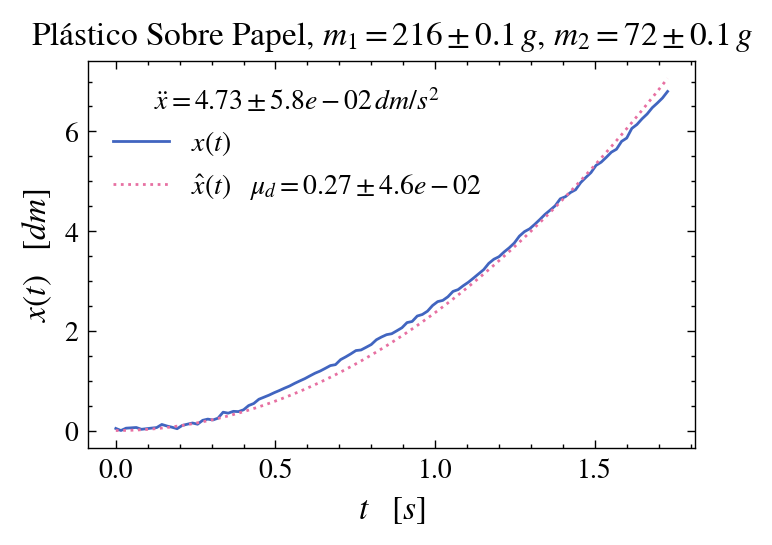

In [395]:
m1 = sled + 3 * woodenMass + 4 * aluminiumMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, plasticOverPaper100['t'], plasticOverPaper100['x'], sigma=np.zeros_like(plasticOverPaper100['x']) + sensor_error, absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')

plt.plot(plasticOverPaper100['t'], plasticOverPaper100['x']*1e1, label=f'$x(t)$')
plt.plot(plasticOverPaper100['t'], x(plasticOverPaper100['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Plástico Sobre Papel, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()

dynamicMu = 0.25
ddot_err = 8.43e-03
sigmamu = 3.7e-02


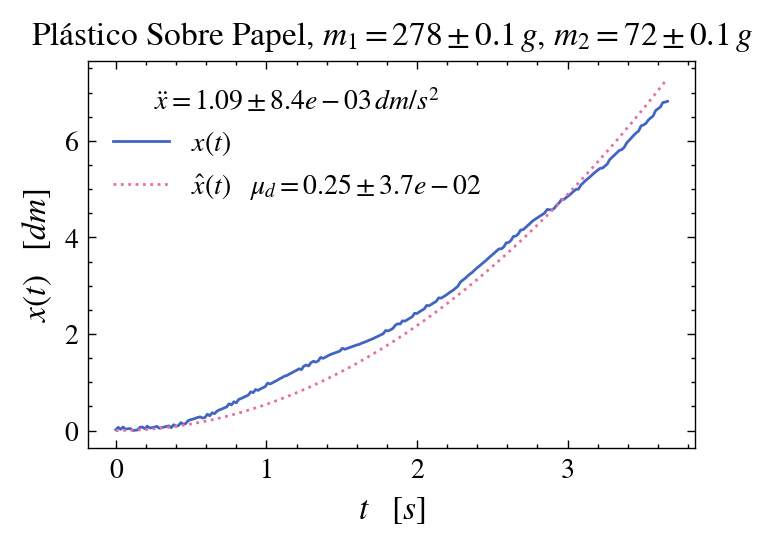

In [396]:
m1 = sled + 5 * woodenMass + 3 * aluminiumMass + bronzeMass
m2 = bronzeMass

f = lambda t, dynamicMu: x(t, m1, m2, sp.constants.g, dynamicMu)

dynamicMu, pcov = sp.optimize.curve_fit(f, plasticOverPaper150['t'], plasticOverPaper150['x'], sigma=np.zeros_like(plasticOverPaper150['x']) + sensor_error, absolute_sigma=True)
dynamicMu = dynamicMu[0]
print(f'dynamicMu = {dynamicMu:.2f}')
ddot_err = np.sqrt(pcov[0, 0])
print(f'ddot_err = {ddot_err:.2e}')

sigmamu = sigmaMu(m1, m2, sp.constants.g, ddotX(m1, m2, sp.constants.g, dynamicMu))
print(f'sigmamu = {sigmamu:.1e}')

plt.plot(plasticOverPaper150['t'], plasticOverPaper150['x']*1e1, label=f'$x(t)$')
plt.plot(plasticOverPaper150['t'], x(plasticOverPaper150['t'], m1, m2, sp.constants.g, dynamicMu)*1e1, label=f'$\hat{{x}}(t) \quad \\mu_d = {dynamicMu:.2f} \pm {sigmamu:.1e}$')
plt.xlabel('$t \\quad [s]$')
plt.ylabel('$x(t) \\quad [dm]$')
plt.legend(title=f'$\ddot{{x}} = {ddotX(m1, m2, sp.constants.g, dynamicMu)*1e1:.2f} \\pm {ddot_err:.1e} \\, dm/s^2$')
plt.title(f'Plástico Sobre Papel, $m_1 = {m1*1e3:.0f}\\pm{0.1} \\, g$, $m_2 = {m2*1e3:.0f} \\pm{0.1} \\, g$')
plt.show()